## Actividad 7: Visualización de datos multivariantes 

In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%ls

 00_00_binder.ipynb
 00_00_primer_pasos.ipynb
 01_01_data_types.ipynb
 01_02_read_iloc_unique_groupby.ipynb
 02_00_data_wrangling.ipynb
 02_01_null_display.ipynb
 02_02_basic_math.ipynb
 Act3.ipynb
'Actividad 5.ipynb'
'Actividad 6 - Presentación Intermedia (1) (1).ipynb'
'Actividad 7 (1) (1).ipynb'
 adult.csv
'antropometria act7.csv'
 antropometria-dataset-1.csv
 antropometria-dataset-2.csv
'clase1 (1).ipynb'
 clase1.ipynb
 clase2.ipynb
 clase2pt2.ipynb
 clase3.ipynb
'clase 3 pt2.ipynb'
 Clase4.ipynb
 clase5.ipynb
 Clase7.ipynb
 Clase8.ipynb
 datasets/
 ejercicio_distribuciones_datos_multivariantes.ipynb
 README.md
 requirements.txt
 Untitled.ipynb
'winequality-red.xls - winequality-red.csv'


In [4]:
df = pd.read_csv('antropometria act7.csv')
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [5]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

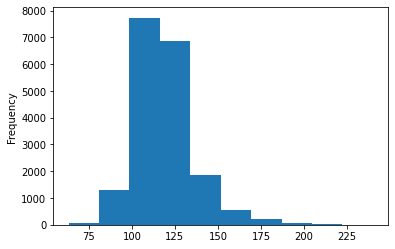

In [6]:
df['sistol'].plot(kind='hist') #histograma de edad

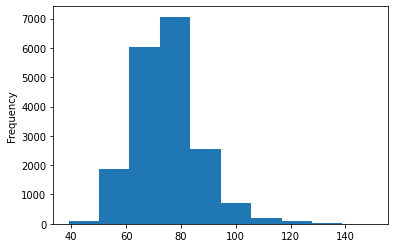

In [7]:
df['diastol'].plot(kind='hist') #histograma de edad

In [8]:
x = df['sistol']
y = df['diastol']

In [9]:
bins = np.linspace(-10, 10, 100)

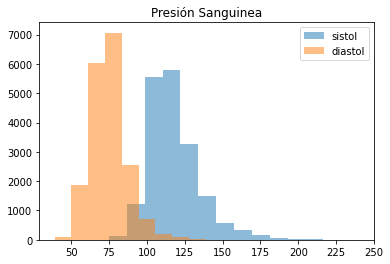

In [10]:
plt.hist(x, bins = 15, alpha=0.5,  label='sistol')
plt.hist(y, alpha=0.5, label='diastol')
plt.legend(loc='upper right')
plt.title('Presión Sanguinea')
plt.show()

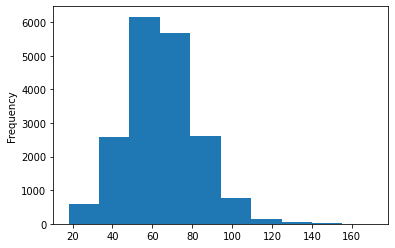

In [11]:
df['peso'].plot(kind='hist') #histograma de edad

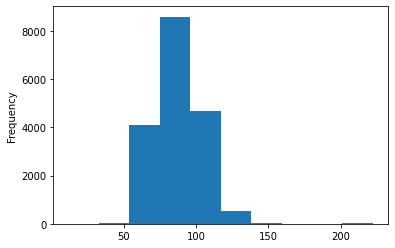

In [12]:
df['cintura'].plot(kind='hist') #histograma de edad

In [13]:
peso1 = df['peso']
cintura1 = df['cintura']

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


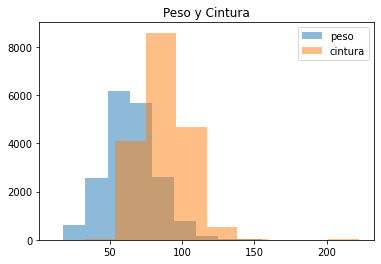

In [14]:
plt.hist(peso1, alpha=0.5, label='peso')
plt.hist(cintura1, alpha=0.5, label='cintura')
plt.legend(loc='upper right')
plt.title('Peso y Cintura')
plt.show()

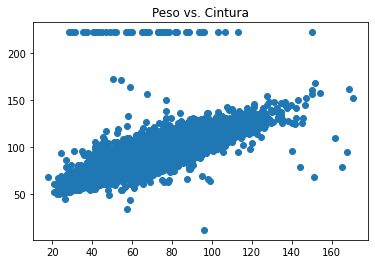

In [15]:
plt.scatter(peso1, cintura1)
plt.title('Peso vs. Cintura')
plt.show()

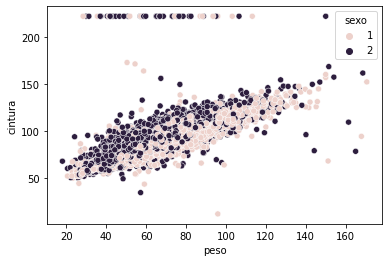

In [16]:
sns.scatterplot(data=df, x='peso', y='cintura', hue='sexo')

# Preguntas a responder: 

## ¿Cómo son cada una de las distribuciones (simétrica, asimétrica, sesgada a la izquierda, segada a la derecha)?

La distribución que presentan los histogramas de presión sanguinea es asimétrica hacia la izquierda. 
La distribución que presentan los histogramas de peso y cintura es 

## Al visualizar los histogramas ¿existen valores atípicos?

Si existen valores atipicos en estas variables. 

## ¿Cómo es el comportamiento del peso con respecto a la cintura?


## Al visualizar el diagrama de dispersión entre la variables 'peso' y 'cintura' ¿existen valores atípicos?
Si existen valores atipicos en este diagrama de dispersion, se pueden observar en la parte de arriba del diagrama. 

## Separa los datos entre hombres y mujeres y repite el análisis. Comenta tus conclusiones.



In [17]:
my_pivot1 = pd.pivot_table(df, 
                          index = 'folio',
                          values = 'sistol',
                          #aggfunc = 'median',
                          columns = 'sexo',
        
                         )
my_pivot1 

sexo,1,2
folio,,
10001,125.0,NaN
10011,111.5,NaN
10015,111.0,NaN
10021,NaN,100.0
10034,NaN,104.5
...,...,...
321843,NaN,107.0
321844,NaN,118.0
321849,110.0,NaN


In [18]:
my_pivot2 = pd.pivot_table(df, 
                          index = 'folio',
                          values = 'diastol',
                          #aggfunc = 'median',
                          columns = 'sexo',
                         )
my_pivot2 

sexo,1,2
folio,,
10001,78.0,NaN
10011,75.0,NaN
10015,80.0,NaN
10021,NaN,60.0
10034,NaN,64.5
...,...,...
321843,NaN,65.0
321844,NaN,60.0
321849,70.0,NaN


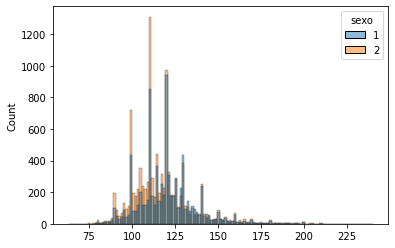

In [19]:
sns.histplot(data=my_pivot1)

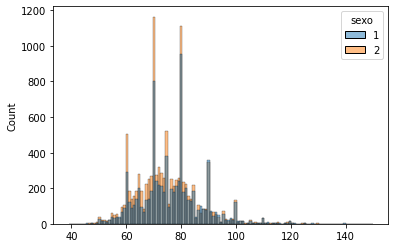

In [20]:
sns.histplot(data=my_pivot2)

In [21]:
my_pivot3 = pd.pivot_table(df, 
                          index = 'folio',
                          values = 'cintura',
                          #aggfunc = 'median',
                          columns = 'sexo',
        
                         )
my_pivot3

sexo,1,2
folio,,
10001,82.1,NaN
10011,78.4,NaN
10015,111.0,NaN
10021,NaN,73.1
10034,NaN,71.9
...,...,...
321838,69.8,NaN
321844,NaN,83.6
321849,105.0,NaN


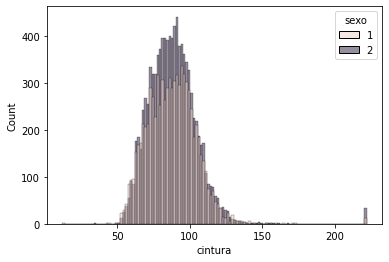

In [22]:
sns.histplot(data=df, x="cintura", hue="sexo")

In [23]:
cintura_mujer=my_pivot3.sort_values(by = 2,
                                     ascending = False,
                                     axis = 0)
cintura_mujer.drop([1],inplace=True, axis=1)
cintura_mujer

sexo,2
folio,
90429,222.22
90922,222.22
90395,222.22
21297,222.22
90575,222.22
...,...
321829,NaN
321832,NaN
321836,NaN


In [24]:
cintura_m = df('sexo').sort_values(by = 2)
cintura_h = df('sexo').sort_values(by = 1)

TypeError: 'DataFrame' object is not callable

In [ ]:
cintura_m.plot(kind='hist') #histograma de edad

In [ ]:
df.columns

In [30]:
sistol = df['sistol']

In [25]:
diastol = df['diastol']

In [27]:
hombre_df = df[df['sexo']==1]
mujer_df= df[df['sexo']==2]
peso= df['peso']
cintura = df['cintura']
mujer_cintura=mujer_df['cintura']
hombre_cintura = hombre_df['cintura']
mujer_peso=mujer_df['peso']
hombre_peso=hombre_df['peso']

Text(0.5, 1.0, 'Histograma Mujer-Cintura')

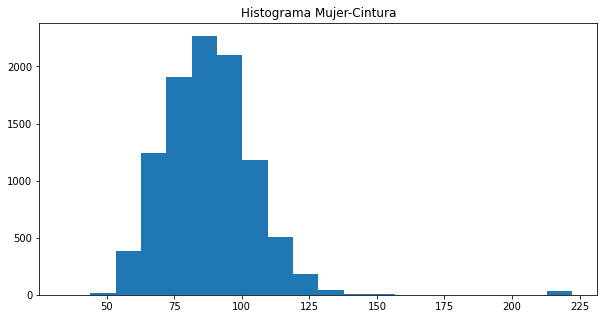

In [42]:
plt.figure(figsize=(10,5)) 
plt.hist(x = mujer_cintura, bins = 20)
plt.title("Histograma Mujer-Cintura") 

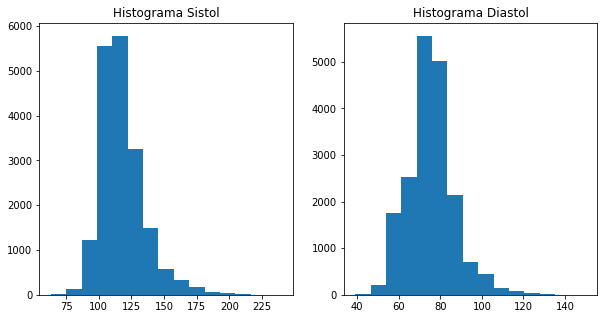

In [32]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,2)
plt.hist(x = diastol, bins = 15)
plt.title("Histograma Diastol") 
plt.subplot(1,2,1)
plt.hist(x = sistol, bins = 15)
plt.title("Histograma Sistol")
plt.show()

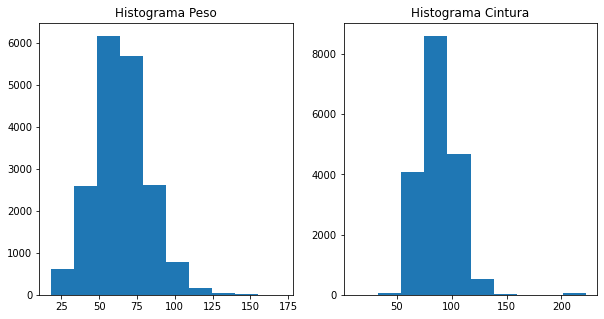

In [34]:
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,2)
plt.hist(x = cintura, bins = 10)
plt.title("Histograma Cintura") 
plt.subplot(1,2,1)
plt.hist(x = peso, bins = 10) 
plt.title("Histograma Peso")
plt.show()

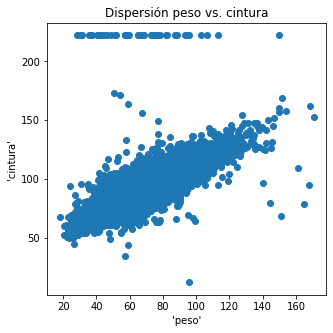

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(x = peso, y = cintura)
plt.xlabel("'peso'")
plt.ylabel("'cintura'") 
plt.title("Dispersión peso vs. cintura")
plt.show()

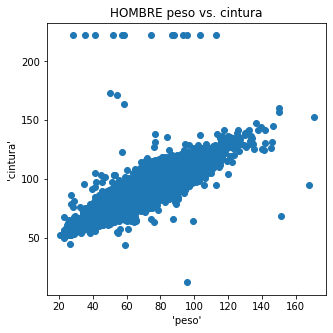

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(x = hombre_peso, y = hombre_cintura)
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("HOMBRE peso vs. cintura")
plt.show()

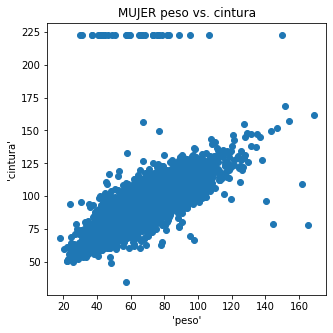

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(x = mujer_peso, y = mujer_cintura) 
plt.xlabel("'peso'")
plt.ylabel("'cintura'")
plt.title("MUJER peso vs. cintura")
plt.show()

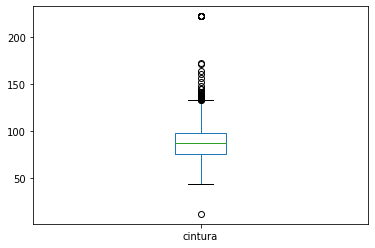

In [39]:
hombre_cintura.plot(kind='box') 